<a href="https://colab.research.google.com/github/SAMMMYYY233/data-science/blob/main/cardiovasculardiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: To classify whether a person has cardiovascular disease or not


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#load your dataset
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [4]:
# store data into a variable
df= pd.read_csv('dataset.csv')

#Printing the first 5 rows data
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Get shape of data
df.shape

(303, 14)

In [6]:
#count empty values in our dataset (coloumn)
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# method 2 to check for any null value in our dataset
df.isnull().values.any()

False

In [8]:
# View some basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
# Get a count of patients with cardiovascular diseases and without
df['target'] .value_counts()



1    165
0    138
Name: target, dtype: int64

<Axes: ylabel='count'>

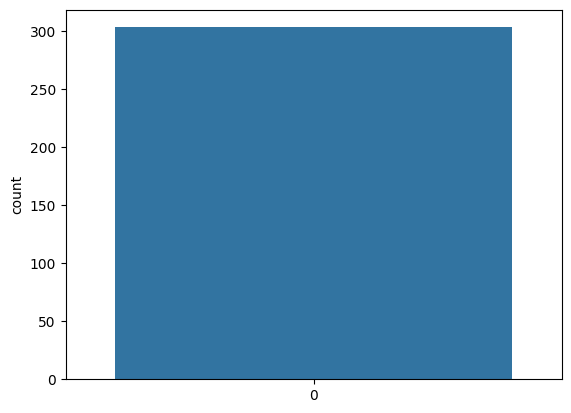

In [22]:
#visualize this count
sns.countplot(df['target'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,years
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,29
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1,34
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,34
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,35
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,71
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,71
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,74
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,76


<Axes: xlabel='years', ylabel='count'>

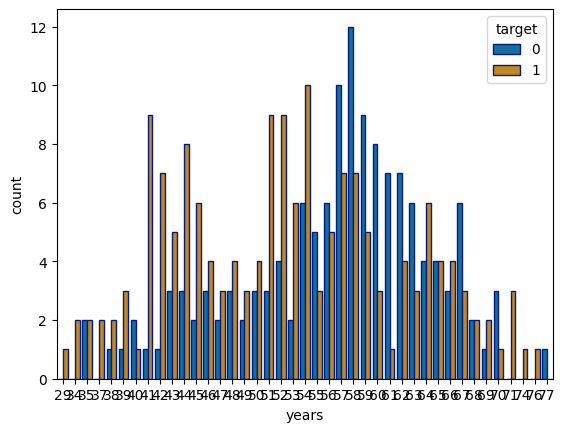

In [32]:
#look at the people with cardiovascular disease that exceed the number of people without cardiovascular disease

#sort age data in ascending order
pop_asc = df.sort_values('age')
display(pop_asc)

#To create a years column
df['years']=(df['age']).round(0)
df['years']=pd.to_numeric(df['years'],downcast='integer')

#visualize the data
sns.countplot(x='years', hue='target' , data=df, palette='colorblind' , edgecolor=sns.color_palette('dark',n_colors=1))

In [33]:
#getting correlation of columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,years
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,1.000000
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.098447
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.068653
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.279351
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.213678
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.121308
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.116211
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.398522
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.096801
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.210013


<Axes: >

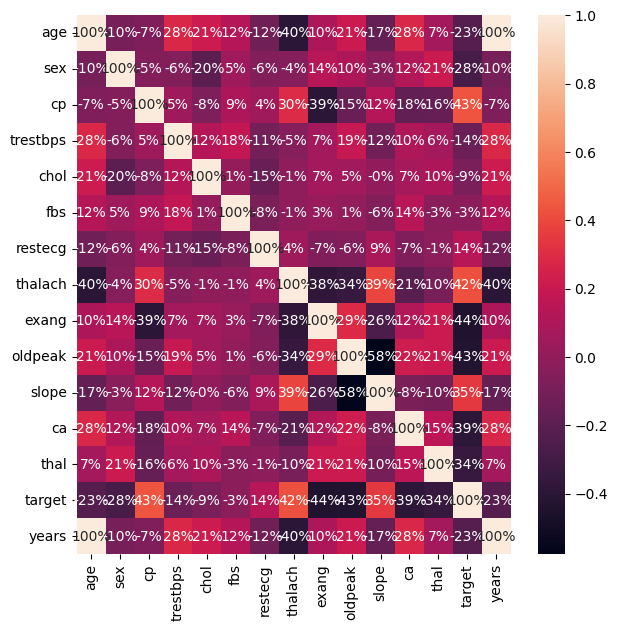

In [34]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True , fmt='.0%')

In [35]:
#Remove or drop years coloumn
df=df.drop('years',axis=1)

In [36]:
#split the data into feature data and target data
X=df.iloc[:, :-1].values
Y=df.iloc[:,-1].values

In [37]:
#split data again into 75% training data and 25% testing data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [38]:
#feature scaling
#scale value in data between 0 and 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [40]:
#test model accuracy on training data
model=forest
model.score(X_train,Y_train)

0.9955947136563876

In [41]:
#test model accuracy on testing data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test))

#creating other variable for confusion maatrix
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#print confusion matrix
print(cm)

#print model accuracy on test data
print('Model test accuracy={}'.format((TP+TN)/(TP+TN+FP+FN)))

[[27  8]
 [13 28]]
Model test accuracy=0.7236842105263158
